count    100.000000
mean      36.994000
std        2.417897
min       30.000000
25%       35.675000
50%       37.000000
75%       38.325000
max       44.900000
Name: MPG, dtype: float64

Axes(0.125,0.11;0.775x0.77)



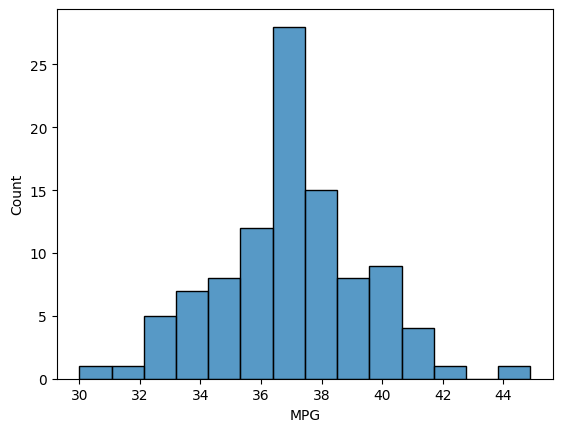

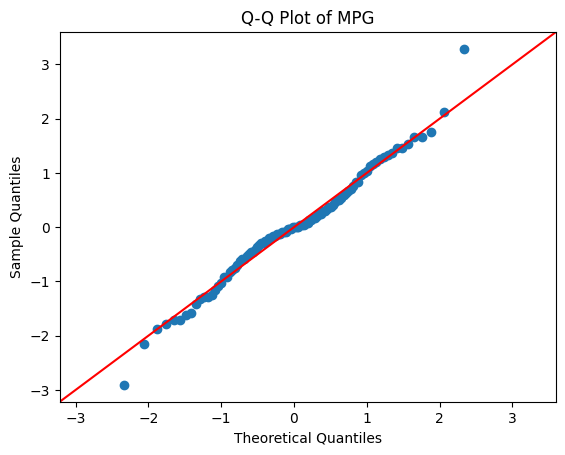

In [1]:
# EXPLORING EPAGAS.CSV (Normal Distribution)
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Load the EPAGAS dataset
mtcars = pd.read_csv('EPAGAS.CSV')

# Extract mpg data
mpg = mtcars['MPG']

# descrpitive statistics
print(mpg.describe())
print()
print(sns.histplot(mpg))
print()

# Create Q-Q plot
sm.qqplot(mpg, line='45', fit=True)
plt.title('Q-Q Plot of MPG')
plt.show()




count    1000.000000
mean       27.635095
std        79.730220
min        10.031000
25%        11.965465
50%        15.806802
75%        24.823894
max      2323.621312
Name: mpg, dtype: float64

Axes(0.125,0.11;0.775x0.77)



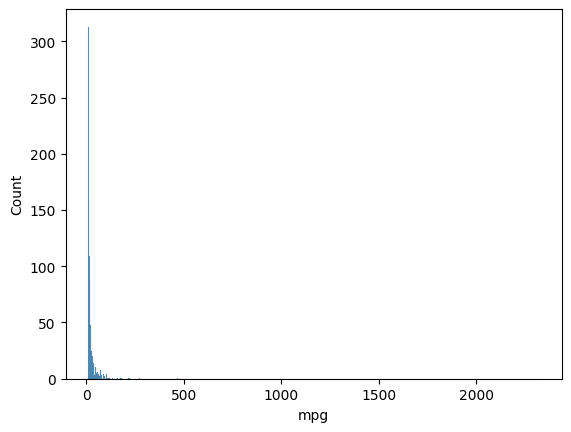

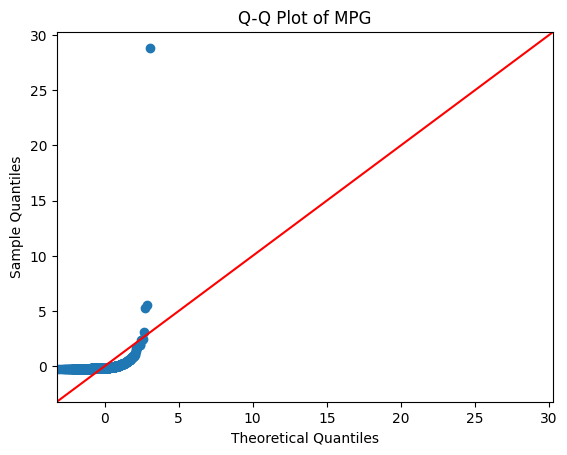

In [2]:
# EXPLORING powerlaw_mpg.csv (Power Law Distribution)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Read the CSV file
df = pd.read_csv('powerlaw_mpg.csv')

# Extract sample data
mpg = df['mpg'].dropna()

# descrpitive statistics
print(mpg.describe())
print()
print(sns.histplot(mpg))
print()

# Create Q-Q plot
sm.qqplot(mpg, line='45', fit=True)
plt.title('Q-Q Plot of MPG')
plt.show()




Calculating best minimal value for power law fit
Estimated alpha (exponent): 2.51
Estimated xmin: 11.07

Log(MPG) | Log(Frequency)
-------------------------
1.5207   | 2.9666
1.9000   | 1.6812
2.0994   | 1.0000
2.2355   | 0.9542
2.3390   | 0.4771
2.4225   | 0.0000
2.6528   | 0.3010
3.3618   | 0.0000



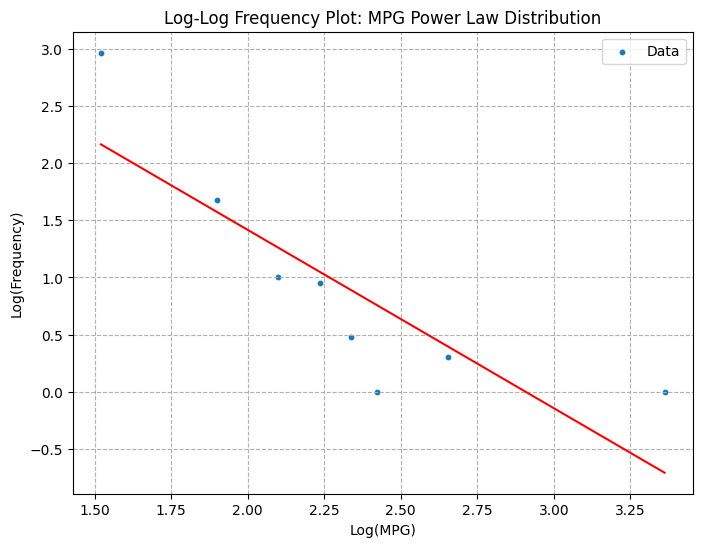

In [4]:
# BONUS CODE (POWER LAW) - PRINTING A LOG-LOG LOG-FREQUENCY PLOT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install powerlaw
import powerlaw
from scipy.stats import linregress

# Read the CSV file
csv_file = 'powerlaw_mpg.csv'  # Replace with your actual file path if different

fit = powerlaw.Fit(mpg, discrete=False)  # Continuous data for mpg
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin
print(f"Estimated alpha (exponent): {alpha:.2f}")
print(f"Estimated xmin: {xmin:.2f}")

# Compute histogram for log-log plot
bins = np.histogram_bin_edges(mpg, bins=50)
frequencies, bin_edges = np.histogram(mpg, bins=bins, density=False)
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Filter out zero frequencies
nonzero = frequencies > 0
bin_midpoints = bin_midpoints[nonzero]
frequencies = frequencies[nonzero]

# Compute log of values and frequencies
log_values = np.log10(bin_midpoints)
log_frequencies = np.log10(frequencies)

# Print log values and frequencies
print()
print("Log(MPG) | Log(Frequency)")
print("-" * 25)
for log_val, log_freq in zip(log_values, log_frequencies):
    print(f"{log_val:.4f}   | {log_freq:.4f}")
print()

# Fit linear regression for trend line
slope, intercept, r_value, _, _ = linregress(log_values, log_frequencies)
trend_line = slope * log_values + intercept

# Log-log frequency plot
plt.figure(figsize=(8, 6))
plt.scatter(log_values, log_frequencies, s=10, label='Data')
plt.plot(log_values, trend_line, 'r-')
plt.xlabel('Log(MPG)')
plt.ylabel('Log(Frequency)')
plt.title('Log-Log Frequency Plot: MPG Power Law Distribution')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

